**Reading our combined dataset with lyrics column.**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/muse/muse_with_lyrics_column2_no_nan.csv")

In [ ]:
print(data.head())

                                          lastfm_url         track  \
0  https://www.last.fm/music/metallica/_/st.%2banger     St. Anger   
1  https://www.last.fm/music/m.i.a./_/bamboo%2bbanga  Bamboo Banga   
2    https://www.last.fm/music/dope/_/die%2bmf%2bdie    Die MF Die   
3  https://www.last.fm/music/drowning%2bpool/_/st...       Step Up   
4  https://www.last.fm/music/kanye%2bwest/_/feedback      Feedback   

          artist                                       seeds  \
0      Metallica                              ['aggressive']   
1         M.I.A.  ['aggressive', 'fun', 'sexy', 'energetic']   
2           Dope                              ['aggressive']   
3  Drowning Pool                              ['aggressive']   
4     Kanye West                              ['aggressive']   

   number_of_emotion_tags  valence_tags  arousal_tags  dominance_tags  \
0                       8      3.710000      5.833000        5.427250   
1                      13      6.555071      5.5

**Importing necessary libraries to tokenize the lyrics.**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Preprocessing our 262 seeds before creating broad emotion categories**

In [ ]:
import ast

# Convert the string representation of list in 'seeds' column to actual lists
data['seeds'] = data['seeds'].apply(lambda x: ast.literal_eval(x))

# Extract unique emotions from the seeds column
unique_emotions = set()
for emotions in data['seeds']:
    unique_emotions.update(emotions)

# Display the unique emotions
unique_emotions

{'acerbic',
 'aggressive',
 'airy',
 'ambitious',
 'amiable',
 'angry',
 'angst-ridden',
 'animated',
 'anxious',
 'apocalyptic',
 'athletic',
 'atmospheric',
 'austere',
 'autumnal',
 'bitter',
 'bittersweet',
 'bleak',
 'boisterous',
 'bombastic',
 'brash',
 'brassy',
 'bravado',
 'bright',
 'brittle',
 'brooding',
 'calm',
 'campy',
 'carefree',
 'cathartic',
 'celebratory',
 'cerebral',
 'cheerful',
 'child-like',
 'circular',
 'clinical',
 'cold',
 'comic',
 'complex',
 'confident',
 'confrontational',
 'consoling',
 'crunchy',
 'cynical',
 'dark',
 'defiant',
 'delicate',
 'demonic',
 'desperate',
 'detached',
 'devotional',
 'difficult',
 'distraught',
 'dramatic',
 'dreamy',
 'driving',
 'druggy',
 'earnest',
 'earthy',
 'eccentric',
 'ecstatic',
 'eerie',
 'effervescent',
 'elaborate',
 'elegant',
 'elegiac',
 'energetic',
 'enigmatic',
 'epic',
 'erotic',
 'ethereal',
 'euphoric',
 'exciting',
 'exotic',
 'explosive',
 'exuberant',
 'feral',
 'feverish',
 'fierce',
 'fiery',


**Creating 5 broad categories for emotions, labels of our dataset: Happy/Fun, Sad/Anxious, Romantic/Loving, Calm/Reflective, Aggressive/Enigmatic**

In [ ]:
# Mapping function to group specific emotions into broader categories
def map_emotions_to_categories(emotions, categories):
    for category, cat_emotions in categories.items():
        if any(emotion in cat_emotions for emotion in emotions):
            return category
    return 'Mix'  # Default category

# Define the categories and corresponding emotions
categories = {

    'Happy/Fun': ['amiable', 'quirky', 'bright', 'carefree', 'cheerful', 'gleeful', 'happy', 'joyous', 'light', 'optimistic', 'perky', 'playful', 'positive', 'sparkling', 'uplifting', 'whimsical','aspirational', 'encouraging', 'hopeful', 'inspirational', 'motivational', 'optimistic', 'uplifting','ecstatic', 'joyful', 'blissful', 'delighted', 'elated', 'euphoric', 'exhilarated', 'glad', 'jubilant', 'overjoyed', 'pleased', 'radiant', 'rapturous', 'thrilled','playful', 'fun', 'cheerful', 'humorous', 'whimsical', 'carefree', 'child-like', 'comic', 'gleeful', 'happy', 'lighthearted', 'quirky', 'silly', 'witty','empowering', 'inspiring', 'motivating', 'uplifting', 'encouraging', 'heartening', 'hopeful', 'optimistic', 'positive', 'reassuring', 'rousing', 'stirring','confident', 'assertive', 'bold', 'determined', 'dominant', 'empowered', 'fearless', 'resolute', 'self-assured', 'strong-willed','campy', 'comic', 'fun', 'humorous', 'irreverent', 'quirky', 'silly', 'whimsical', 'witty','effervescent', 'exuberant', 'frolicsome', 'high-spirited', 'impish', 'mischievous', 'playful', 'prankish', 'waggish', 'whimsical','energetic', 'exciting', 'lively', 'kinetic', 'exuberant', 'bombastic', 'boisterous', 'rambunctious', 'raucous', 'rowdy', 'animated', 'brash', 'brassy', 'flashy', 'giddy', 'jovial', 'joyous', 'uplifting'],
    'Calm/Reflective': ['calm', 'peaceful', 'relaxed', 'soothing', 'gentle', 'laid-back', 'mellow', 'serene', 'tranquil', 'meditative', 'quiet','earthy', 'rustic', 'agrarian', 'natural', 'outdoorsy', 'pastoral', 'rural', 'restrained', 'smooth', 'soft', 'tender','reflective', 'introspective', 'meditative', 'philosophical', 'contemplative', 'pensive', 'thoughtful', 'soul-searching', 'deep', 'profound','austere', 'bare', 'minimal', 'plain', 'simple', 'sparse', 'spartan', 'unadorned'],
    'Sad/Anxious': ['sad', 'melancholy', 'bittersweet', 'elegiac', 'gloomy', 'somber', 'plaintive', 'regretful', 'wistful', 'bleak', 'brooding', 'dramatic', 'funereal', 'languid', 'lonely', 'mournful', 'nostalgic', 'poignant', 'reflective', 'tragic','dark', 'brooding', 'sinister', 'bleak', 'foreboding', 'gloomy', 'ominous', 'morose', 'somber', 'sullen', 'moody', 'shadowy', 'sombre', 'stark','anxious', 'tense', 'nervous', 'edgy', 'restless', 'uneasy', 'worried', 'apprehensive', 'concerned', 'distraught', 'jittery', 'stressful', 'troubled','acerbic', 'bitter', 'cynical', 'ironic', 'sardonic', 'snide', 'wry'],
    'Aggressive/Enigmatic': ['aggressive', 'angry', 'confrontational', 'fierce', 'fiery', 'hostile', 'intense', 'menacing', 'outraged', 'savage', 'threatening','mysterious', 'enigmatic', 'cryptic', 'eerie', 'spooky', 'surreal', 'uncanny', 'weird', 'otherworldly', 'peculiar', 'strange', 'unearthly', 'unusual','complex', 'intriguing', 'complicated', 'deep', 'inscrutable', 'intellectual', 'nuanced', 'sophisticated', 'subtle', 'tangled', 'feral', 'feverish', 'gritty', 'harsh', 'mighty', 'powerful', 'strong', 'urgent', 'violent'],
    'Romantic/Loving': ['romantic', 'amorous', 'passionate', 'sensual', 'tender', 'intimate', 'loving', 'sentimental', 'sweet', 'affectionate', 'dreamy', 'erotic', 'sexy', 'soft', 'sugary', 'warm'],
}
# Update the mapping function to handle dropping the 'Energetic/Vibrant' category
def map_emotions_to_categories_with_dropping(emotions, categories):
    category_counts = {category: 0 for category in categories}
    for emotion in emotions:
        for category, cat_emotions in categories.items():
            if emotion in cat_emotions:
                category_counts[category] += 1

    # Filter categories with the max count
    max_count = max(category_counts.values())
    tied_categories = [cat for cat, count in category_counts.items() if count == max_count]

    # Return None if 'Energetic/Vibrant' is one of the tied categories
    if 'Energetic/Vibrant' in tied_categories:
        return None  # Drop the 'Energetic/Vibrant' category

    # Return None if there's more than one category with the max count
    if len(tied_categories) > 1:
        return None  # or any other indicator for dropping the record

    # Return the single category if there's no tie
    return tied_categories[0] if max_count > 0 else 'Other'

# Apply the updated mapping function
data['broad_category'] = data['seeds'].apply(lambda x: map_emotions_to_categories_with_dropping(x, categories))

# Drop the rows where broad_category is None (or the chosen indicator)
data = data.dropna(subset=['broad_category'])

# Display the first few rows of the updated dataframe
data.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,...,tag,year,views,features,lyrics,id,language_cld3,language_ft,language,broad_category
0,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,[aggressive],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,...,rock,2003.0,90250.0,{},[Verse]\nSaint Anger 'round my neck\nSaint Ang...,82703.0,en,en,en,Aggressive/Enigmatic
1,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"[aggressive, fun, sexy, energetic]",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,...,rap,2007.0,24157.0,{},"[Intro]\nRoad runner, road runner\nGoing hundr...",51931.0,ig,en,NaN,Happy/Fun
2,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,[aggressive],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,...,rock,2001.0,8445.0,{},[Intro]\nDie!\n\n[Verse]\nI don't need your fo...,3279929.0,en,en,en,Aggressive/Enigmatic
3,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,[aggressive],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,...,rock,2004.0,1928.0,{},"[Intro]\nOne, two, three, go!\n\n[Verse 1]\nBr...",907509.0,en,en,en,Aggressive/Enigmatic
4,https://www.last.fm/music/kanye%2bwest/_/feedback,Feedback,Kanye West,[aggressive],1,3.080000,5.870000,5.490000,NaN,49fT6owWuknekShh9utsjv,...,rap,2016.0,721165.0,{},"[Chorus]\nAyy, ya heard about the good news?\n...",2421329.0,en,en,en,Aggressive/Enigmatic


**Cleaning the lyrics column and vectorization. Encoding our emotion labels**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

# Download NLTK stopwords
import nltk
nltk.download('stopwords')


# Check for missing values
print(data.isnull().sum())

# Function to clean and preprocess lyrics
def clean_text(text):
    # Remove square brackets and special characters
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply text preprocessing to the 'lyrics' column
data['cleaned_lyrics'] = data['lyrics'].apply(clean_text)

# Encode broad_category labels
label_encoder = LabelEncoder()
data['broad_category_encoded'] = label_encoder.fit_transform(data['broad_category'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_lyrics'], data['broad_category_encoded'], test_size=0.2, random_state=42)

# Step 2: Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


lastfm_url                   0
track                        0
artist                       0
seeds                        0
number_of_emotion_tags       0
valence_tags                 0
arousal_tags                 0
dominance_tags               0
mbid                      1656
spotify_id                1487
genre                      467
title                        0
tag                          0
year                         0
views                        0
features                     0
lyrics                       0
id                           0
language_cld3              172
language_ft                130
language                   320
broad_category               0
dtype: int64


In [ ]:
print(data.head())

          track         artist                               seeds  \
0     St. Anger      Metallica                        [aggressive]   
1  Bamboo Banga         M.I.A.  [aggressive, fun, sexy, energetic]   
2    Die MF Die           Dope                        [aggressive]   
3       Step Up  Drowning Pool                        [aggressive]   
4      Feedback     Kanye West                        [aggressive]   

   number_of_emotion_tags  valence_tags  arousal_tags  dominance_tags  \
0                       8      3.710000      5.833000        5.427250   
1                      13      6.555071      5.537214        5.691357   
2                       7      3.771176      5.348235        5.441765   
3                       9      2.971389      5.537500        4.726389   
4                       1      3.080000      5.870000        5.490000   

               spotify_id    genre         title   tag    year  \
0  3fOc9x06lKJBhz435mInlH    metal     St. Anger  rock  2003.0   
1  6tqFC

**The amount of examples for each broad emotion category:**


In [ ]:
label_counts = data['broad_category'].value_counts()

# Display the counts for each label
print(label_counts)

Happy/Fun               5582
Sad/Anxious             4427
Romantic/Loving         3314
Calm/Reflective         3272
Aggressive/Enigmatic    3206
Name: broad_category, dtype: int64


In [ ]:
data.describe()

,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,year,broad_category_encoded
count,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000,19801.000000
mean,5.069845,5.739921,4.402146,5.461031,2000.971719,2.125448
std,4.686098,1.542722,1.129231,1.084875,18.137594,1.363418
min,1.000000,0.497313,0.278333,0.515398,1.000000,0.000000
25%,2.000000,4.686667,3.585000,4.770000,1997.000000,1.000000
50%,3.000000,6.035714,4.380412,5.675000,2004.000000,2.000000
75%,7.000000,6.972500,5.295000,6.260000,2008.000000,3.000000
max,47.000000,8.470000,7.270000,7.440000,2022.000000,4.000000


XGB Classifier training just with cleaned lyrics

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:02:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on selected dataset: 0.5348958333333333
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       614
           1       0.49      0.52      0.50       628
           2       0.43      0.42      0.42       626
           3       0.57      0.52      0.54       660
           4       0.59      0.62      0.60       647
           5       0.54      0.51      0.52       665

    accuracy                           0.53      3840
   macro avg       0.53      0.54      0.53      3840
weighted avg       0.53      0.53      0.53      3840

Confusion Matrix on selected dataset:
[[392  51  59  39  33  40]
 [ 38 325  76  49  62  78]
 [ 81  60 262  73  81  69]
 [ 60  78  80 340  51  51]
 [ 36  69  44  50 398  50]
 [ 66  79  86  45  52 337]]


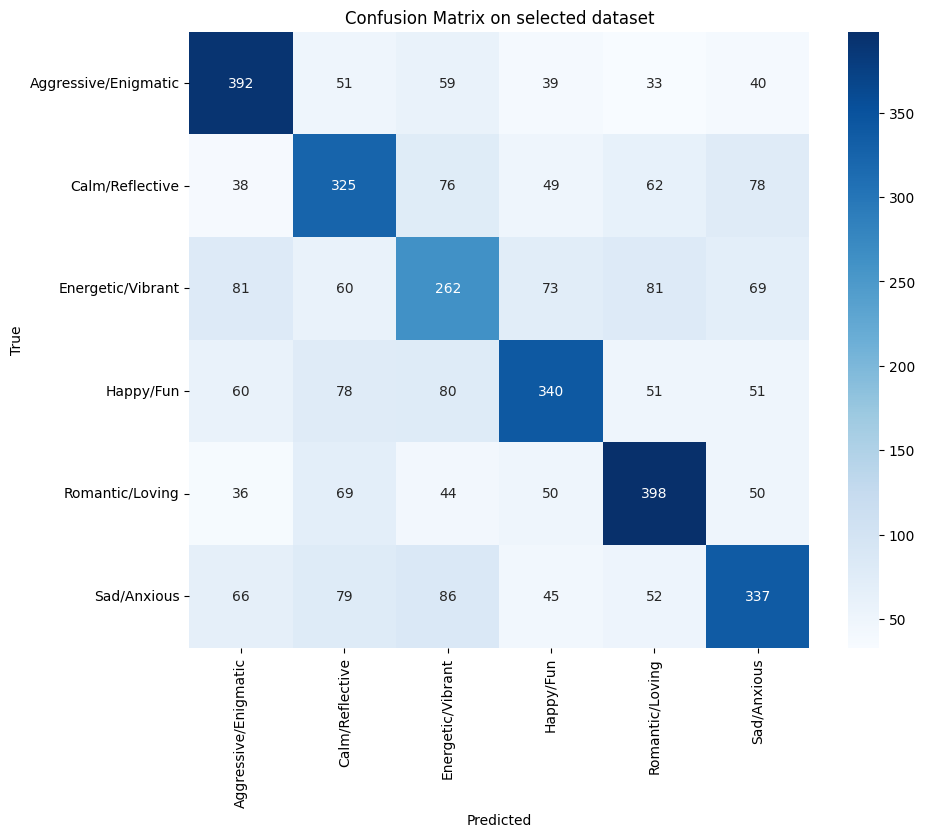

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Count the number of examples for each label
label_counts = data['broad_category'].value_counts()

# Define the number of examples to be taken from each category
num_samples_per_category = 3200

# Select fixed number of examples from each label
selected_data = pd.DataFrame()

for label in label_counts.index:
    label_data = data[data['broad_category'] == label]
    selected_data = pd.concat([selected_data, resample(label_data, n_samples=num_samples_per_category, random_state=42)])

# Encode broad_category labels in the selected dataset
selected_data['broad_category_encoded'] = label_encoder.transform(selected_data['broad_category'])

# Split the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized_selected = vectorizer.fit_transform(X_train_selected)
X_test_vectorized_selected = vectorizer.transform(X_test_selected)

# Model Training (XGBoost)
model_selected = XGBClassifier(objective='multi:softmax', num_class=len(label_counts), random_state=42, scale_pos_weight='balanced')
model_selected.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_selected = model_selected.predict(X_test_vectorized_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.show()


Hyperparameter tuning for XGBClassifier using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the parameter distributions for XGBoost
param_dist = {
    'learning_rate': stats.uniform(0.01, 0.2),
    'max_depth': stats.randint(3, 6),
    'min_child_weight': stats.randint(1, 6),
    'subsample': stats.uniform(0.8, 0.2)
}

# Create XGBoost model
model_selected = XGBClassifier(objective='multi:softmax', num_class=len(label_counts), random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_selected, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train_vectorized_selected, y_train_selected)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_selected = best_model.predict(X_test_vectorized_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)


Best Parameters: {'learning_rate': 0.20475110376829186, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 0.8764923982534326}
Accuracy on selected dataset: 0.46536458333333336
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       614
           1       0.47      0.45      0.46       628
           2       0.38      0.35      0.36       626
           3       0.48      0.47      0.48       660
           4       0.49      0.55      0.52       647
           5       0.45      0.41      0.43       665

    accuracy                           0.47      3840
   macro avg       0.46      0.47      0.46      3840
weighted avg       0.46      0.47      0.46      3840

Confusion Matrix on selected dataset:
[[346  44  56  45  62  61]
 [ 42 285  76  67  80  78]
 [ 91  67 216  88  89  75]
 [ 62  62  85 312  73  66]
 [ 40  74  52  69 357  55]
 [ 79  77  91  72  75 271]]


Training RandomForestClassifier with the valence, arousal, dominance values and cleaned lyrics. That was one of the bests for now.

Accuracy on selected dataset: 0.6955729166666667
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       614
           1       0.68      0.75      0.71       628
           2       0.63      0.46      0.53       626
           3       0.73      0.72      0.73       660
           4       0.73      0.71      0.72       647
           5       0.65      0.74      0.69       665

    accuracy                           0.70      3840
   macro avg       0.69      0.70      0.69      3840
weighted avg       0.69      0.70      0.69      3840

Confusion Matrix on selected dataset:
[[488  11  26  25  19  45]
 [  7 469  35  12  40  65]
 [ 91  56 290  64  45  80]
 [ 23  53  31 475  46  32]
 [ 10  50  19  66 459  43]
 [ 40  51  58   5  21 490]]


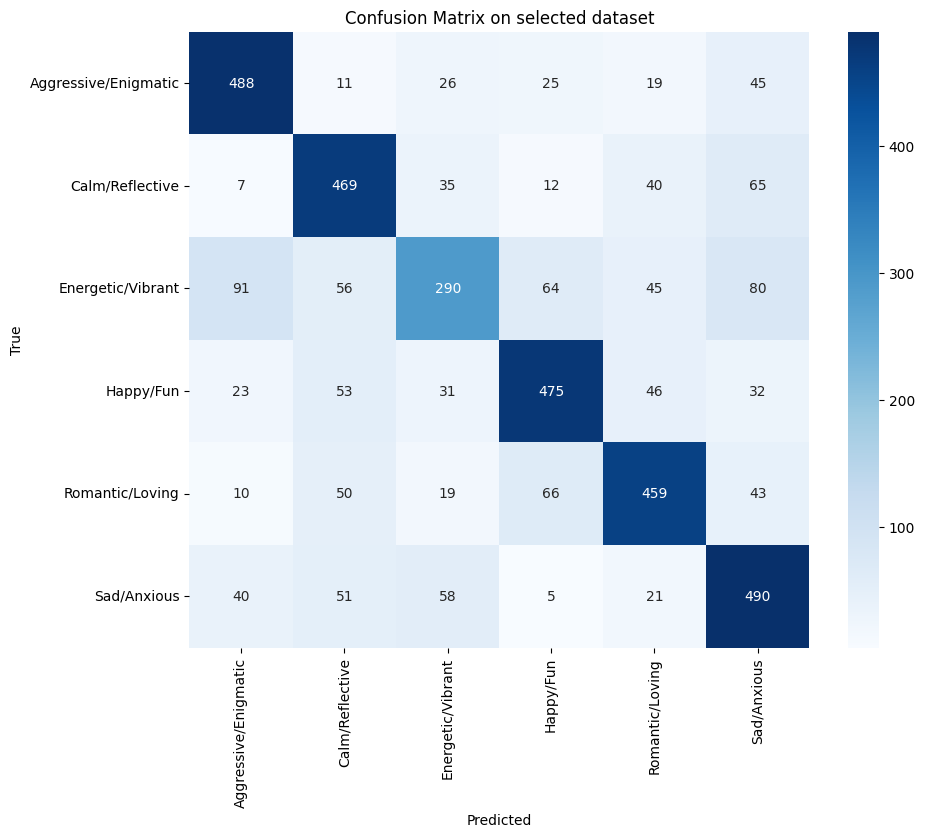

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# Assuming you already have label_encoder and vectorizer defined

# Count the number of examples for each label
label_counts = data['broad_category_encoded'].value_counts()

# Define the number of examples to be taken from each category
num_samples_per_category = 3200

# Select a fixed number of examples from each label
selected_data = pd.DataFrame()

for label in label_counts.index:
    label_data = data[data['broad_category_encoded'] == label]
    selected_data = pd.concat([selected_data, resample(label_data, n_samples=num_samples_per_category, random_state=42)])

# Split the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_data.drop('broad_category_encoded', axis=1),  # Include all columns except the target
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization for cleaned_lyrics column
vectorizer = TfidfVectorizer()
X_train_vectorized_selected = vectorizer.fit_transform(X_train_selected['cleaned_lyrics'])
X_test_vectorized_selected = vectorizer.transform(X_test_selected['cleaned_lyrics'])

# Concatenate the text vectorized features with other numeric features
X_train_vectorized_selected = sp.sparse.hstack((X_train_vectorized_selected, X_train_selected.drop('cleaned_lyrics', axis=1).values))
X_test_vectorized_selected = sp.sparse.hstack((X_test_vectorized_selected, X_test_selected.drop('cleaned_lyrics', axis=1).values))

# Model Training
model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_selected = model_selected.predict(X_test_vectorized_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.show()

**BEST RESULTS TRAINING RandomForestClassifier WITH VALENCE, AROUSAL, DOMINANCE AND CLEANED LYRICS**

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on selected dataset: 0.785
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       588
           1       0.78      0.81      0.80       650
           2       0.79      0.75      0.77       608
           3       0.83      0.74      0.78       690
           4       0.73      0.81      0.77       664

    accuracy                           0.79      3200
   macro avg       0.79      0.79      0.79      3200
weighted avg       0.79      0.79      0.79      3200

Confusion Matrix on selected dataset:
[[482  14  32  16  44]
 [  6 528  17  26  73]
 [ 35  37 458  35  43]
 [ 16  64  61 508  41]
 [ 60  34  10  24 536]]


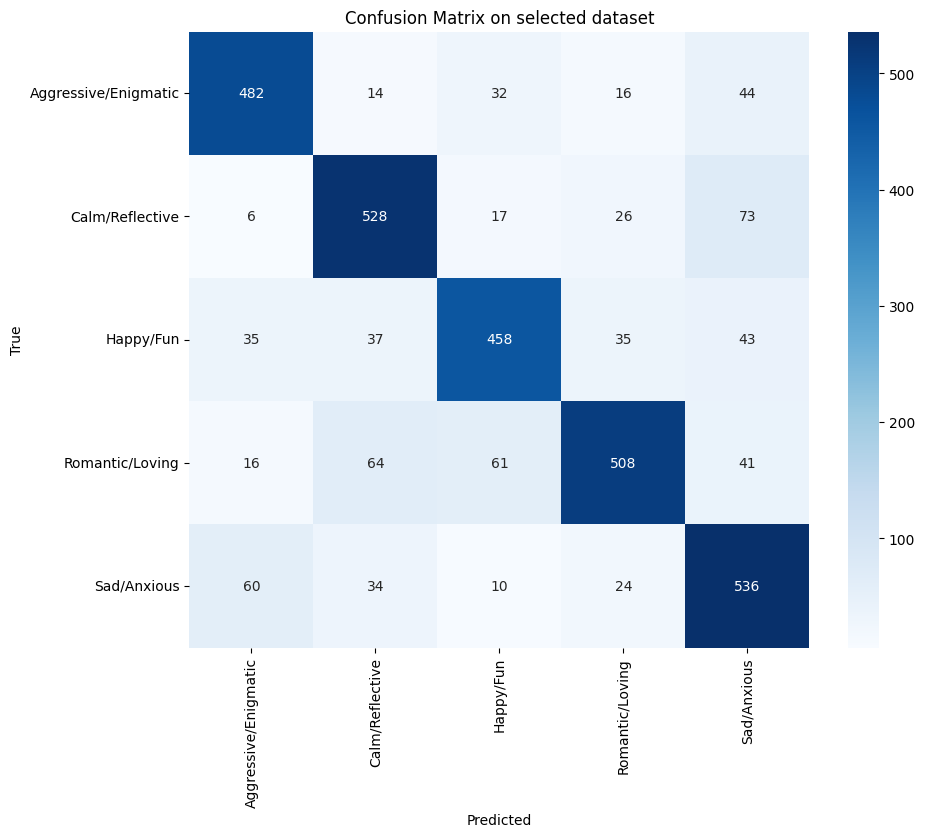

In [ ]:
# Assuming you have 'data' and 'vectorizer' defined
# ...

# Count the number of examples for each label
label_counts = data['broad_category'].value_counts()

# Define the number of examples to be taken from each category
num_samples_per_category = 3200

# Select a fixed number of examples from each label
selected_data = pd.DataFrame()

for label in label_counts.index:
    label_data = data[data['broad_category'] == label]
    selected_data = pd.concat([selected_data, resample(label_data, n_samples=num_samples_per_category, random_state=42)])

# Encode broad_category labels in the selected dataset
label_encoder = LabelEncoder()
selected_data['broad_category_encoded'] = label_encoder.fit_transform(selected_data['broad_category'])

# Split the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_data[['valence_tags', 'arousal_tags', 'dominance_tags', 'cleaned_lyrics']],  # Include all relevant columns
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization with TF-IDF and n-grams for 'cleaned_lyrics'
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vectorized_selected = vectorizer.fit_transform(X_train_selected['cleaned_lyrics'])
X_test_vectorized_selected = vectorizer.transform(X_test_selected['cleaned_lyrics'])

# Combine the text vectorized features with other numeric features
X_train_vectorized_selected = hstack([X_train_vectorized_selected, X_train_selected[['valence_tags', 'arousal_tags', 'dominance_tags']].values])
X_test_vectorized_selected = hstack([X_test_vectorized_selected, X_test_selected[['valence_tags', 'arousal_tags', 'dominance_tags']].values])

# Create and train the RandomForestClassifier with the specified hyperparameters
best_hyperparameters = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
rf_classifier = RandomForestClassifier(random_state=42, **best_hyperparameters)
rf_classifier.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_selected = rf_classifier.predict(X_test_vectorized_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.show()


**SAVING THE BEST MODEL**

In [ ]:
import os
import joblib

# Define the directory to save the model and results
save_directory = '/content/drive/MyDrive/data/muse/train4_BEST_with_tagsandlyrics'

# Save the trained RandomForestClassifier model
model_filename = 'rf_model.pkl'
joblib.dump(rf_classifier, os.path.join(save_directory, model_filename))

# Save the model evaluation metrics
metrics_filename = 'model_metrics.txt'
with open(os.path.join(save_directory, metrics_filename), 'w') as metrics_file:
    metrics_file.write(f"Best hyperparameters: {best_hyperparameters}\n")
    metrics_file.write(f"Accuracy on selected dataset: {accuracy_selected}\n")
    metrics_file.write("Classification Report on selected dataset:\n")
    metrics_file.write(f"{classification_rep_selected}\n")
    metrics_file.write("Confusion Matrix on selected dataset:\n")
    metrics_file.write(f"{conf_matrix_selected}\n")

# Save the confusion matrix visualization
visualization_filename = 'confusion_matrix.png'
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.savefig(os.path.join(save_directory, visualization_filename))
plt.close()  # Close the current figure to free up memory

# Print a message indicating successful save
print(f"Model, metrics, and visualization saved to: {save_directory}")


Model, metrics, and visualization saved to: /content/drive/MyDrive/data/muse/train4_BEST_with_tagsandlyrics


Tranining XGBClassifier with valence, arousal, dominance and cleaned lyrics improves the results for XGBClassifier.

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack

# Assuming you have 'data' defined
# ...

# Count the number of examples for each label
label_counts = data['broad_category'].value_counts()

# Define the number of examples to be taken from each category
num_samples_per_category = 3200

# Select a fixed number of examples from each label
selected_data = pd.DataFrame()

for label in label_counts.index:
    label_data = data[data['broad_category'] == label]
    selected_data = pd.concat([selected_data, resample(label_data, n_samples=num_samples_per_category, random_state=42)])

# Encode broad_category labels in the selected dataset
label_encoder = LabelEncoder()
selected_data['broad_category_encoded'] = label_encoder.fit_transform(selected_data['broad_category'])

# Split the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_data[['valence_tags', 'arousal_tags', 'dominance_tags', 'cleaned_lyrics']],  # Include all relevant columns
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization with TF-IDF and n-grams for 'cleaned_lyrics'
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vectorized_selected = vectorizer.fit_transform(X_train_selected['cleaned_lyrics'])
X_test_vectorized_selected = vectorizer.transform(X_test_selected['cleaned_lyrics'])

# Combine the text vectorized features with other numeric features
tfidf_feature_names = vectorizer.get_feature_names_out()
numeric_feature_names = ['valence_tags', 'arousal_tags', 'dominance_tags']

X_train_vectorized_selected = hstack([X_train_vectorized_selected, X_train_selected[numeric_feature_names].values])
X_test_vectorized_selected = hstack([X_test_vectorized_selected, X_test_selected[numeric_feature_names].values])

# Create and train the XGBClassifier with the specified hyperparameters
best_hyperparameters = {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.8}
xgb_classifier = XGBClassifier(random_state=42, **best_hyperparameters)
xgb_classifier.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_selected = xgb_classifier.predict(X_test_vectorized_selected)


print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test_selected, y_pred_selected), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost on selected dataset')
plt.show()

Best hyperparameters: {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.8}
Accuracy on selected dataset: 0.63875
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       588
           1       0.62      0.77      0.69       650
           2       0.76      0.51      0.61       608
           3       0.60      0.52      0.56       690
           4       0.59      0.70      0.64       664

    accuracy                           0.64      3200
   macro avg       0.65      0.64      0.64      3200
weighted avg       0.65      0.64      0.64      3200

Confusion Matrix on selected dataset:
[[406  26  19  35 102]
 [  5 500  21  51  73]
 [ 57  60 311 111  69]
 [ 48 150  53 362  77]
 [ 82  65   5  47 465]]


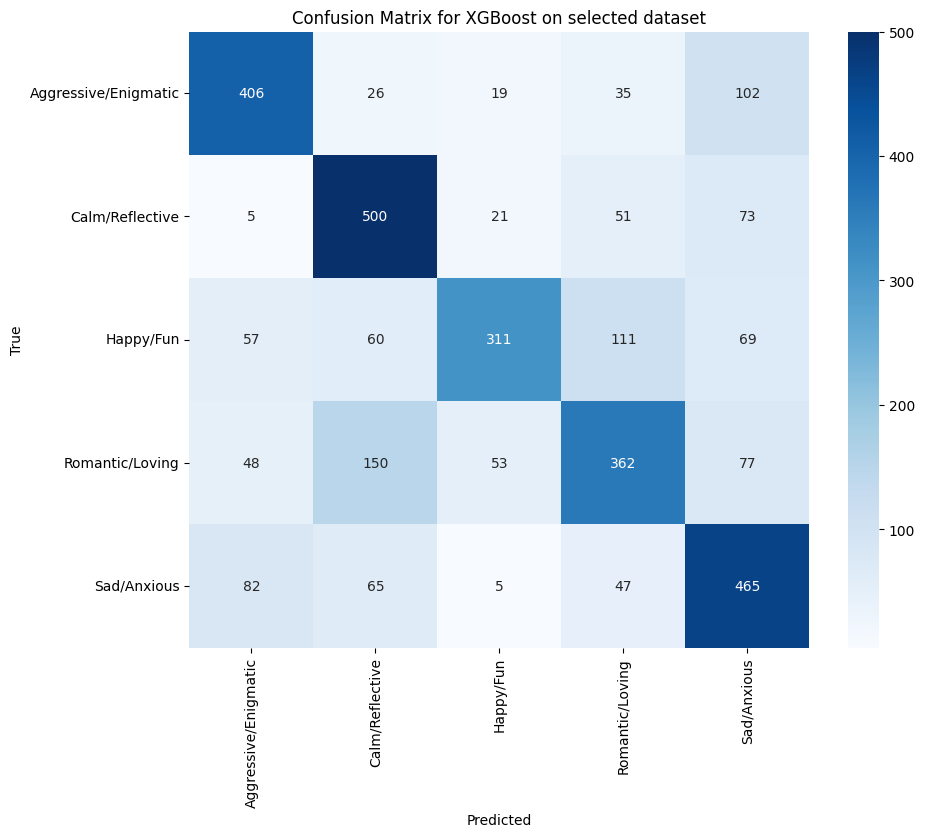

In [ ]:
# Visualization of Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test_selected, y_pred_selected), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost on selected dataset')
plt.show()

Training SVM with the same features as above

SVM Model Evaluation:
Accuracy on selected dataset: 0.671875
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       588
           1       0.69      0.80      0.74       650
           2       0.66      0.60      0.63       608
           3       0.64      0.59      0.62       690
           4       0.67      0.64      0.65       664

    accuracy                           0.67      3200
   macro avg       0.67      0.67      0.67      3200
weighted avg       0.67      0.67      0.67      3200

Confusion Matrix on selected dataset:
[[426  16  38  25  83]
 [  9 522  25  46  48]
 [ 54  52 365  89  48]
 [ 39 107  98 410  36]
 [ 79  61  26  71 427]]


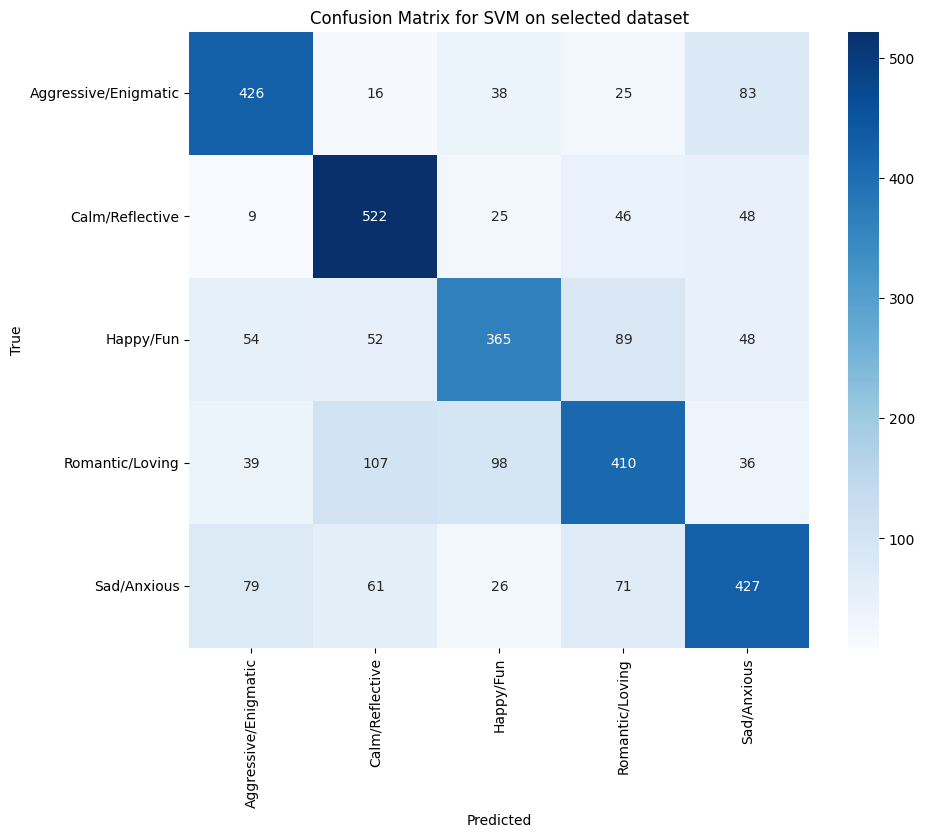

In [ ]:
from sklearn.svm import SVC

# Create and train the SVM classifier with the specified hyperparameters
svm_classifier = SVC(kernel='linear', C=1)  # You can adjust the kernel and C parameter as needed
svm_classifier.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_svm = svm_classifier.predict(X_test_vectorized_selected)

accuracy_svm = accuracy_score(y_test_selected, y_pred_svm)
classification_rep_svm = classification_report(y_test_selected, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_selected, y_pred_svm)

print("SVM Model Evaluation:")
print(f"Accuracy on selected dataset: {accuracy_svm}")
print("Classification Report on selected dataset:")
print(classification_rep_svm)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_svm)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM on selected dataset')
plt.show()


**Best results for training just with the cleaned lyrcis using RandomForestClassifier.**

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on selected dataset: 0.6646875
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       588
           1       0.70      0.62      0.66       650
           2       0.59      0.67      0.63       608
           3       0.73      0.70      0.72       690
           4       0.63      0.61      0.62       664

    accuracy                           0.66      3200
   macro avg       0.67      0.67      0.66      3200
weighted avg       0.67      0.66      0.66      3200

Confusion Matrix on selected dataset:
[[432  24  54  23  55]
 [ 41 404  64  64  77]
 [ 51  57 406  48  46]
 [ 44  42  65 483  56]
 [ 68  54  99  41 402]]


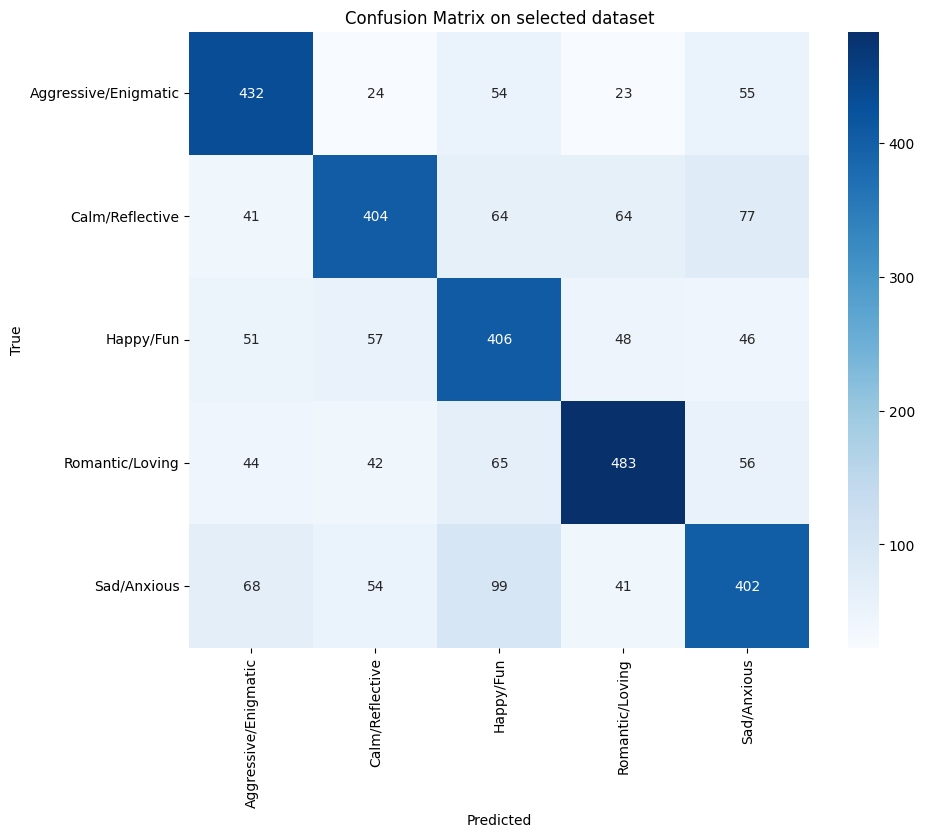

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have 'data' and 'vectorizer' defined
# ...

# Count the number of examples for each label
label_counts = data['broad_category'].value_counts()

# Define the number of examples to be taken from each category
num_samples_per_category = 3200

# Select a fixed number of examples from each label
selected_data = pd.DataFrame()

for label in label_counts.index:
    label_data = data[data['broad_category'] == label]
    selected_data = pd.concat([selected_data, resample(label_data, n_samples=num_samples_per_category, random_state=42)])

# Encode broad_category labels in the selected dataset
label_encoder = LabelEncoder()
selected_data['broad_category_encoded'] = label_encoder.fit_transform(selected_data['broad_category'])

# Split the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization with TF-IDF and n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vectorized_selected = vectorizer.fit_transform(X_train_selected)
X_test_vectorized_selected = vectorizer.transform(X_test_selected)

# Create and train the RandomForestClassifier with the specified hyperparameters
best_hyperparameters = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
rf_classifier = RandomForestClassifier(random_state=42, **best_hyperparameters)
rf_classifier.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_selected = rf_classifier.predict(X_test_vectorized_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.show()


In [ ]:
# Assume 'input_lyrics' is the lyrics you want to classify
input_lyrics = """
There stands a door that I was yet to consider
But the locks are all melting and the colors are convincing me
Words on the gate reading I'll make this all go away
Just walk through me to the silence, that's the music
In the valley of nothing where everyone started
Before life erased you and made you not part of it
Broke off a piece of what was silent, but eternal
And then trapped in a body we beg to return to it
Placed in the depths of an ocean, forgetting
How we belong at the surface but everyone's swimming
Towards lights at the bottom reflecting on mirrors
But I could labor no longer and float towards what everyone
Fears the eternal that's found in the shallows
But one day they will realize what I have just figured out
Here, at the bottom, it's cold and it's sort of merciless
But the water gets warmer as you float away from it
On my way to live the greatest
Life, not have one, or I'll just stick around
And see if it gets better
This decision lasts forever
Seeing pictures, filled with envy
Trying to become who I used to be
It seems so far from likely
Smiling he looks nothing like me
Levers and pulleys and spindles of wire
My limbs are all frozen and my lungs are on fire
And here in your arms I feel miles away from you
Know how it's strange, but I mean all that I'm saying, oh
Levers, and pulleys, and spindles of rope
In that perfect machine that I used to be, something broke
And then a thought so unnatural that it felt like perfection
Came and knocked on my door, and in time I just let it in
Asking me if I had heard of the surface
Where nothing goes wrong, and where no one can ever hurt you
And taking my hand it allowed me to breathe
Said that there's a way to always feel the way you feel
When you finally find your way to sleep
And then it showed me my life
How it could end, and where it started
And then it showed me the world but said I'm not a part of it
But the lonely and the hurting have a place, no one's seen it
But once I have shown you, you can't ever leave it
No matter these thoughts, and these words, so inviting
I can't say goodbye just quite yet I'll keep fighting it
People who love me would never stop hurting
From something so simple yet something so permanent
Gone into the valley where everyone started
Where smiles are worn by the hopeless and the brokenhearted
There in the light of the stars dancing quietly
Spirits at home in the warmth of eternity
Broken boy who must keep hoping
Maybe one day he will figure this out
Or things will heal in time
This breathing ghost that never died
These bits and pieces all left over
From that smiling child I used to be
I'm cold and terrified
I know there's warmth but I can't find it
"""

# Clean and preprocess the input lyrics
cleaned_input_lyrics = clean_text(input_lyrics)

# Vectorize the preprocessed input lyrics
input_lyrics_vectorized = vectorizer.transform([cleaned_input_lyrics])

# Predict the emotion label
predicted_label = rf_classifier.predict(input_lyrics_vectorized)

# Decode the predicted label using the label encoder
predicted_emotion = label_encoder.inverse_transform(predicted_label)

# Print the result
print(f"Predicted Emotion: {predicted_emotion[0]}")


Predicted Emotion: Sad/Anxious


**Saving the best model trained just with cleaned lyrics**

In [ ]:
import joblib
import os

# Define the path to save the model and results
save_path = '/content/drive/MyDrive/data/muse/train5_with_justlyrics'

# Save the trained RandomForestClassifier model
model_filename = 'rf_model_selected.pkl'
model_path = os.path.join(save_path, model_filename)
joblib.dump(rf_classifier, model_path)

# Save the results, metrics, and visualization
results_filename = 'model_results_selected.txt'
results_path = os.path.join(save_path, results_filename)

# Save metrics and results to a text file
with open(results_path, 'w') as file:
    file.write(f"Best hyperparameters: {best_hyperparameters}\n")
    file.write(f"Accuracy on selected dataset: {accuracy_selected}\n")
    file.write("Classification Report on selected dataset:\n")
    file.write(f"{classification_rep_selected}\n")
    file.write("Confusion Matrix on selected dataset:\n")
    file.write(f"{conf_matrix_selected}\n")

# Save the visualization
visualization_filename = 'confusion_matrix_selected.png'
visualization_path = os.path.join(save_path, visualization_filename)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.savefig(visualization_path)
plt.close()  # Close the plot to avoid displaying it again

print(f"Model, results, metrics, and visualization saved at {save_path}")


Model, results, metrics, and visualization saved at /content/drive/MyDrive/data/muse/train5_with_justlyrics


**Hyperparameter tuning for RandomForestClassifier trained just with the cleaned lyrics using GridSearchCV with the old broad_category:**

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on selected dataset: 0.6
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       614
           1       0.58      0.56      0.57       628
           2       0.48      0.45      0.46       626
           3       0.62      0.62      0.62       660
           4       0.64      0.67      0.65       647
           5       0.60      0.58      0.59       665

    accuracy                           0.60      3840
   macro avg       0.60      0.60      0.60      3840
weighted avg       0.60      0.60      0.60      3840

Confusion Matrix on selected dataset:
[[439  23  44  36  36  36]
 [ 34 354  77  40  55  68]
 [ 76  60 282  80  66  62]
 [ 41  44  73 411  39  52]
 [ 27  60  44  45 431  40]
 [ 40  66  70  51  51 387]]


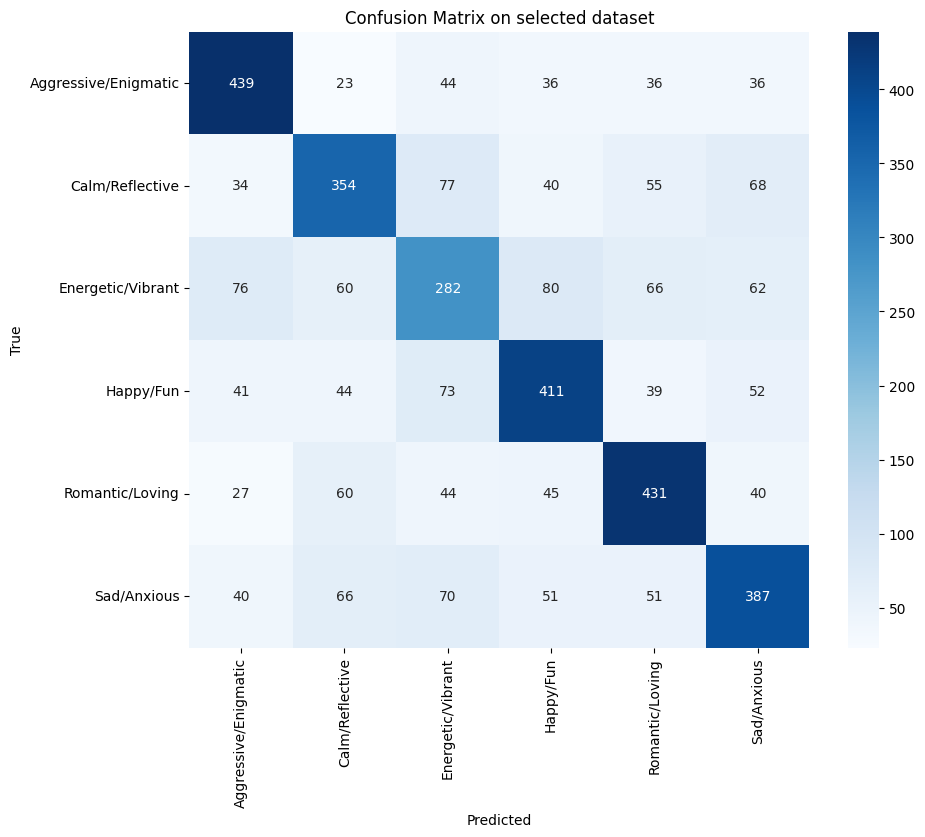

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have 'data', 'label_encoder', and 'vectorizer' defined
# ...

# Count the number of examples for each label
label_counts = data['broad_category'].value_counts()

# Define the number of examples to be taken from each category
num_samples_per_category = 3200

# Select a fixed number of examples from each label
selected_data = pd.DataFrame()

for label in label_counts.index:
    label_data = data[data['broad_category'] == label]
    selected_data = pd.concat([selected_data, resample(label_data, n_samples=num_samples_per_category, random_state=42)])

# Encode broad_category labels in the selected dataset
label_encoder = LabelEncoder()
selected_data['broad_category_encoded'] = label_encoder.fit_transform(selected_data['broad_category'])

# Split the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization with TF-IDF and n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vectorized_selected = vectorizer.fit_transform(X_train_selected)
X_test_vectorized_selected = vectorizer.transform(X_test_selected)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_vectorized_selected, y_train_selected)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Model Evaluation
y_pred_selected = best_rf_model.predict(X_test_vectorized_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.show()


The model was doing poorly on Energetic/Vibrant so we increased the examples in that category.

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy on selected dataset: 0.5938461538461538
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.66      0.70      0.67       623
           1       0.59      0.53      0.56       641
           2       0.45      0.53      0.49       682
           3       0.64      0.58      0.61       631
           4       0.67      0.69      0.68       654
           5       0.59      0.54      0.57       669

    accuracy                           0.59      3900
   macro avg       0.60      0.59      0.60      3900
weighted avg       0.60      0.59      0.59      3900

Confusion Matrix on selected dataset:
[[433  26  81  23  22  38]
 [ 25 338 105  48  53  72]
 [ 87  69 363  57  63  43]
 [ 46  39  91 366  38  51]
 [ 25  39  59  33 453  45]
 [ 45  58 105  49  49 363]]


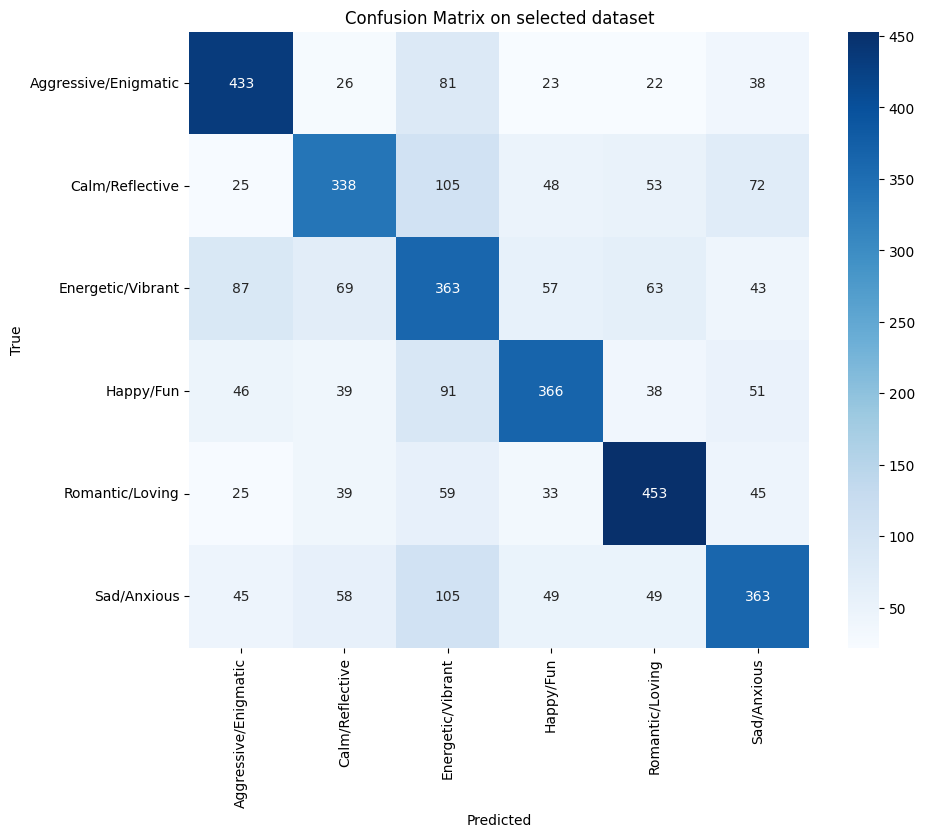

In [ ]:
# Count the number of examples for each label
label_counts = data['broad_category'].value_counts()

# Define the number of examples to be taken from each category
num_samples_per_category = 3200

# Select a fixed number of examples from each label
selected_data = pd.DataFrame()

for label in label_counts.index:
    if label == 'Energetic/Vibrant':
        num_samples = 3500
    else:
        num_samples = num_samples_per_category

    label_data = data[data['broad_category'] == label]
    selected_data = pd.concat([selected_data, resample(label_data, n_samples=num_samples, random_state=42)])

# Encode broad_category labels in the selected dataset
label_encoder = LabelEncoder()
selected_data['broad_category_encoded'] = label_encoder.fit_transform(selected_data['broad_category'])

# Split the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization with TF-IDF and n-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_vectorized_selected = vectorizer.fit_transform(X_train_selected)
X_test_vectorized_selected = vectorizer.transform(X_test_selected)

# Use the provided best hyperparameters
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)

# Fit the model
best_rf_model.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_selected = best_rf_model.predict(X_test_vectorized_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

print("Best hyperparameters:", {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200})
print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.show()


Training SVM just with the cleaned lyrics:

Accuracy on cleaned_lyrics dataset: 0.4786458333333333
Classification Report on cleaned_lyrics dataset:
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       614
           1       0.40      0.43      0.42       628
           2       0.39      0.39      0.39       626
           3       0.53      0.50      0.51       660
           4       0.51      0.53      0.52       647
           5       0.49      0.44      0.47       665

    accuracy                           0.48      3840
   macro avg       0.48      0.48      0.48      3840
weighted avg       0.48      0.48      0.48      3840

Confusion Matrix on cleaned_lyrics dataset:
[[358  53  66  42  43  52]
 [ 51 270  89  65  81  72]
 [ 81  93 242  76  74  60]
 [ 54  64  84 329  67  62]
 [ 47  90  53  53 345  59]
 [ 59  97  91  57  67 294]]


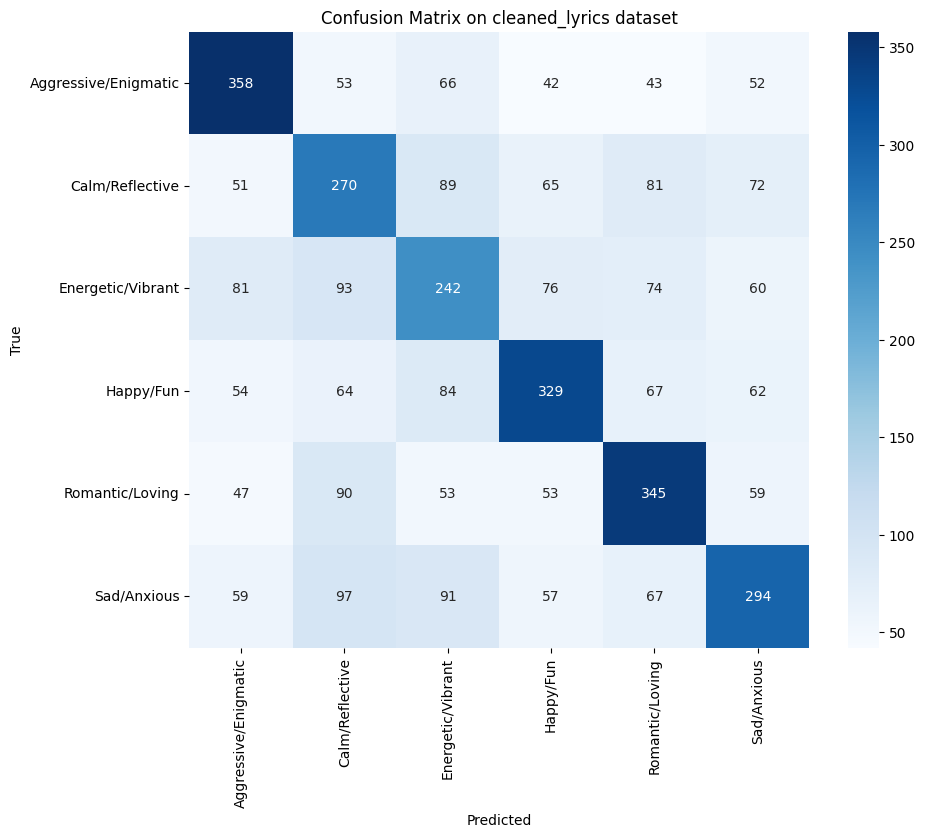

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have label_encoder and vectorizer defined

# Split the selected dataset
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization for cleaned_lyrics column
vectorizer_cleaned = TfidfVectorizer()
X_train_vectorized_cleaned = vectorizer_cleaned.fit_transform(X_train_cleaned)
X_test_vectorized_cleaned = vectorizer_cleaned.transform(X_test_cleaned)

# Model Training
model_cleaned = SVC(kernel='linear', random_state=42)  # You can choose a different classifier here
model_cleaned.fit(X_train_vectorized_cleaned, y_train_cleaned)

# Model Evaluation
y_pred_cleaned = model_cleaned.predict(X_test_vectorized_cleaned)

accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_rep_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)
conf_matrix_cleaned = confusion_matrix(y_test_cleaned, y_pred_cleaned)

print(f"Accuracy on cleaned_lyrics dataset: {accuracy_cleaned}")
print("Classification Report on cleaned_lyrics dataset:")
print(classification_rep_cleaned)
print("Confusion Matrix on cleaned_lyrics dataset:")
print(conf_matrix_cleaned)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cleaned, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on cleaned_lyrics dataset')
plt.show()

Training GradientBoostingClassifier just with the cleaned lyrics:

Accuracy on cleaned_lyrics dataset: 0.36171875
Classification Report on cleaned_lyrics dataset:
              precision    recall  f1-score   support

           0       0.46      0.43      0.44       614
           1       0.34      0.29      0.31       628
           2       0.27      0.31      0.29       626
           3       0.37      0.36      0.37       660
           4       0.38      0.48      0.42       647
           5       0.36      0.31      0.33       665

    accuracy                           0.36      3840
   macro avg       0.36      0.36      0.36      3840
weighted avg       0.36      0.36      0.36      3840

Confusion Matrix on cleaned_lyrics dataset:
[[264  47  98  67  71  67]
 [ 55 183  98  78 127  87]
 [ 89  81 191  92 100  73]
 [ 54  79 126 238  96  67]
 [ 44  73  89  70 309  62]
 [ 70  82 101  97 111 204]]


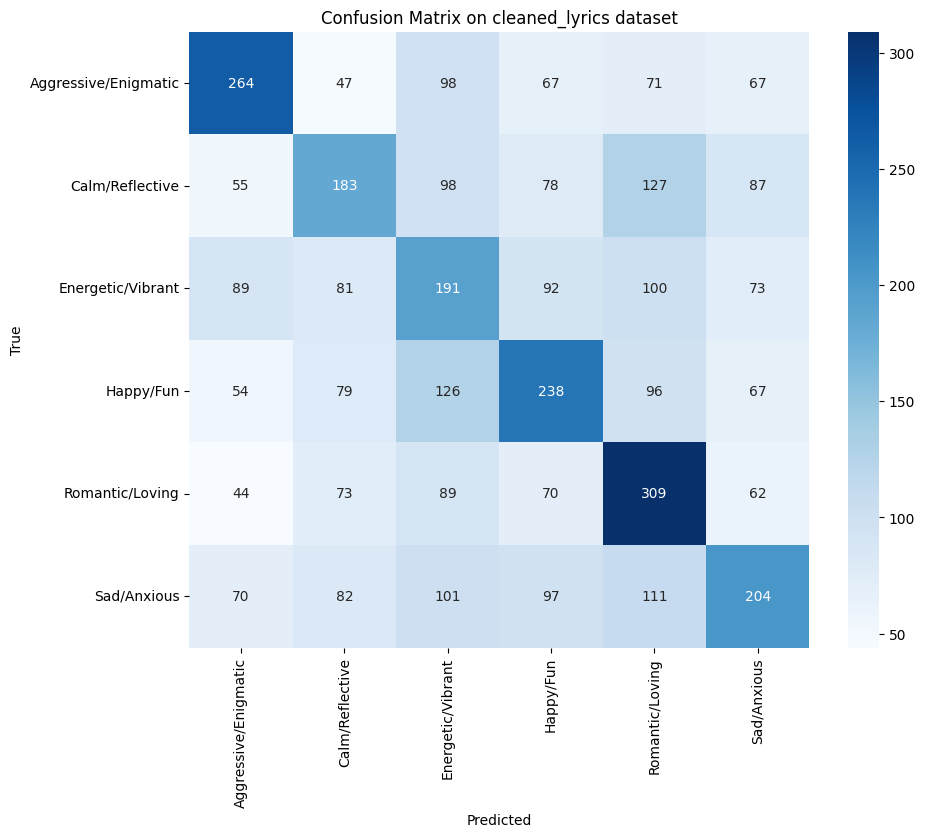

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have label_encoder and vectorizer defined

# Split the selected dataset
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization for cleaned_lyrics column
vectorizer_cleaned = TfidfVectorizer()
X_train_vectorized_cleaned = vectorizer_cleaned.fit_transform(X_train_cleaned)
X_test_vectorized_cleaned = vectorizer_cleaned.transform(X_test_cleaned)

# Model Training
model_cleaned = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_cleaned.fit(X_train_vectorized_cleaned, y_train_cleaned)

# Model Evaluation
y_pred_cleaned = model_cleaned.predict(X_test_vectorized_cleaned)

accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_rep_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)
conf_matrix_cleaned = confusion_matrix(y_test_cleaned, y_pred_cleaned)

print(f"Accuracy on cleaned_lyrics dataset: {accuracy_cleaned}")
print("Classification Report on cleaned_lyrics dataset:")
print(classification_rep_cleaned)
print("Confusion Matrix on cleaned_lyrics dataset:")
print(conf_matrix_cleaned)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cleaned, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on cleaned_lyrics dataset')
plt.show()


Training Multinomial Naive-Bayes just with the cleaned lyrics:

Accuracy on cleaned_lyrics dataset: 0.4513020833333333
Classification Report on cleaned_lyrics dataset:
              precision    recall  f1-score   support

           0       0.57      0.54      0.55       614
           1       0.33      0.60      0.43       628
           2       0.54      0.22      0.32       626
           3       0.62      0.35      0.45       660
           4       0.45      0.54      0.49       647
           5       0.42      0.47      0.44       665

    accuracy                           0.45      3840
   macro avg       0.49      0.45      0.45      3840
weighted avg       0.49      0.45      0.45      3840

Confusion Matrix on cleaned_lyrics dataset:
[[329 100  28  16  67  74]
 [ 34 375  24  27  80  88]
 [ 78 162 140  40  95 111]
 [ 55 165  28 230  90  92]
 [ 35 155  15  26 347  69]
 [ 44 169  22  31  87 312]]


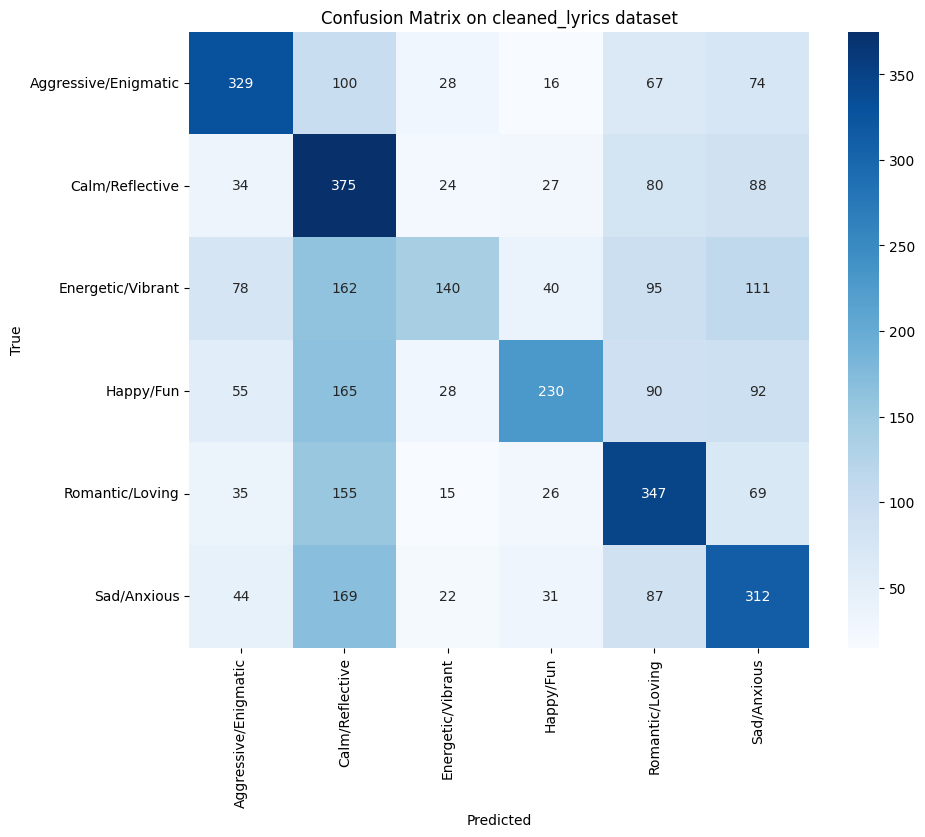

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have label_encoder and vectorizer defined

# Split the selected dataset
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization for cleaned_lyrics column
vectorizer_cleaned = TfidfVectorizer()
X_train_vectorized_cleaned = vectorizer_cleaned.fit_transform(X_train_cleaned)
X_test_vectorized_cleaned = vectorizer_cleaned.transform(X_test_cleaned)

# Model Training
model_cleaned = MultinomialNB()
model_cleaned.fit(X_train_vectorized_cleaned, y_train_cleaned)

# Model Evaluation
y_pred_cleaned = model_cleaned.predict(X_test_vectorized_cleaned)

accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_rep_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)
conf_matrix_cleaned = confusion_matrix(y_test_cleaned, y_pred_cleaned)

print(f"Accuracy on cleaned_lyrics dataset: {accuracy_cleaned}")
print("Classification Report on cleaned_lyrics dataset:")
print(classification_rep_cleaned)
print("Confusion Matrix on cleaned_lyrics dataset:")
print(conf_matrix_cleaned)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cleaned, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on cleaned_lyrics dataset')
plt.show()


Training KNeighbours Classifier just with the cleaned lyrics:

Accuracy on cleaned_lyrics dataset: 0.375
Classification Report on cleaned_lyrics dataset:
              precision    recall  f1-score   support

           0       0.74      0.24      0.36       614
           1       0.78      0.43      0.56       628
           2       0.68      0.30      0.42       626
           3       0.75      0.13      0.23       660
           4       0.79      0.21      0.34       647
           5       0.22      0.91      0.36       665

    accuracy                           0.38      3840
   macro avg       0.66      0.37      0.38      3840
weighted avg       0.66      0.38      0.37      3840

Confusion Matrix on cleaned_lyrics dataset:
[[145   5  16   2   4 442]
 [  5 272   9   2   5 335]
 [ 12  15 189  10   5 395]
 [ 10  18  25  89  13 505]
 [  9  28  25   8 139 438]
 [ 16  11  14   7  11 606]]


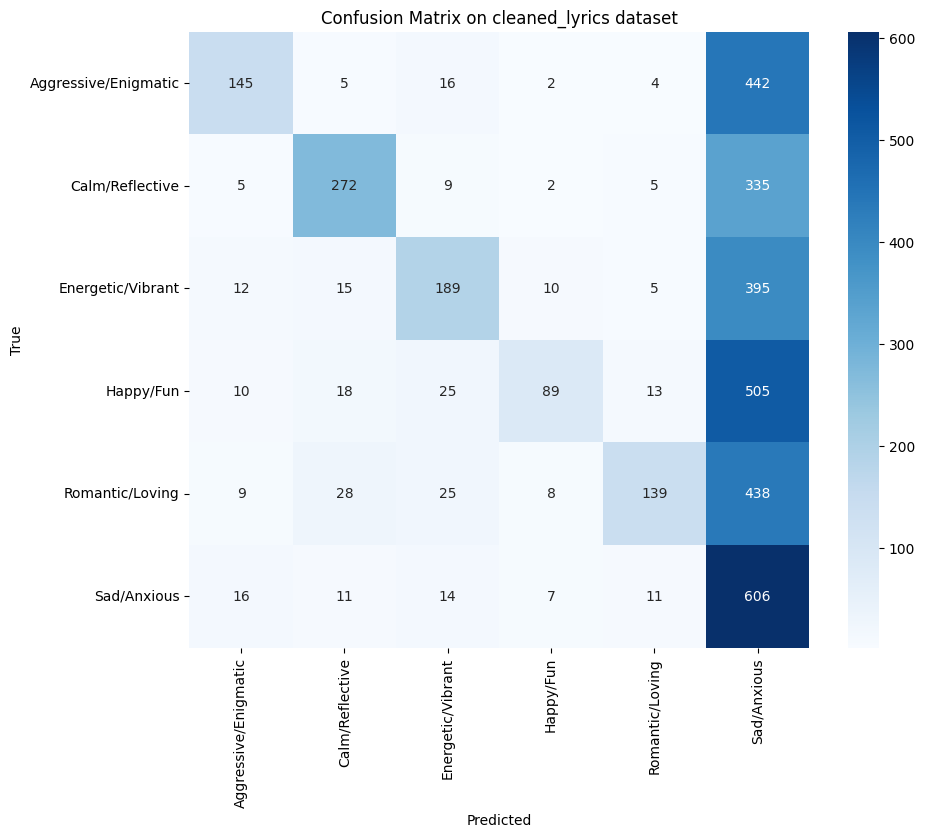

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have label_encoder and vectorizer defined

# Split the selected dataset
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization for cleaned_lyrics column
vectorizer_cleaned = TfidfVectorizer()
X_train_vectorized_cleaned = vectorizer_cleaned.fit_transform(X_train_cleaned)
X_test_vectorized_cleaned = vectorizer_cleaned.transform(X_test_cleaned)

# Model Training
model_cleaned = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model_cleaned.fit(X_train_vectorized_cleaned, y_train_cleaned)

# Model Evaluation
y_pred_cleaned = model_cleaned.predict(X_test_vectorized_cleaned)

accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
classification_rep_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)
conf_matrix_cleaned = confusion_matrix(y_test_cleaned, y_pred_cleaned)

print(f"Accuracy on cleaned_lyrics dataset: {accuracy_cleaned}")
print("Classification Report on cleaned_lyrics dataset:")
print(classification_rep_cleaned)
print("Confusion Matrix on cleaned_lyrics dataset:")
print(conf_matrix_cleaned)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cleaned, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on cleaned_lyrics dataset')
plt.show()


Training RandomForestClassifier just with cleaned lyrics, this was the best result among above models:

Accuracy on selected dataset: 0.5979166666666667
Classification Report on selected dataset:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       614
           1       0.54      0.56      0.55       628
           2       0.48      0.46      0.47       626
           3       0.61      0.60      0.61       660
           4       0.66      0.69      0.68       647
           5       0.62      0.56      0.59       665

    accuracy                           0.60      3840
   macro avg       0.60      0.60      0.60      3840
weighted avg       0.60      0.60      0.60      3840

Confusion Matrix on selected dataset:
[[445  36  43  28  30  32]
 [ 34 350  63  59  54  68]
 [ 81  75 289  70  58  53]
 [ 50  67  68 396  37  42]
 [ 18  50  58  40 445  36]
 [ 44  72  77  54  47 371]]


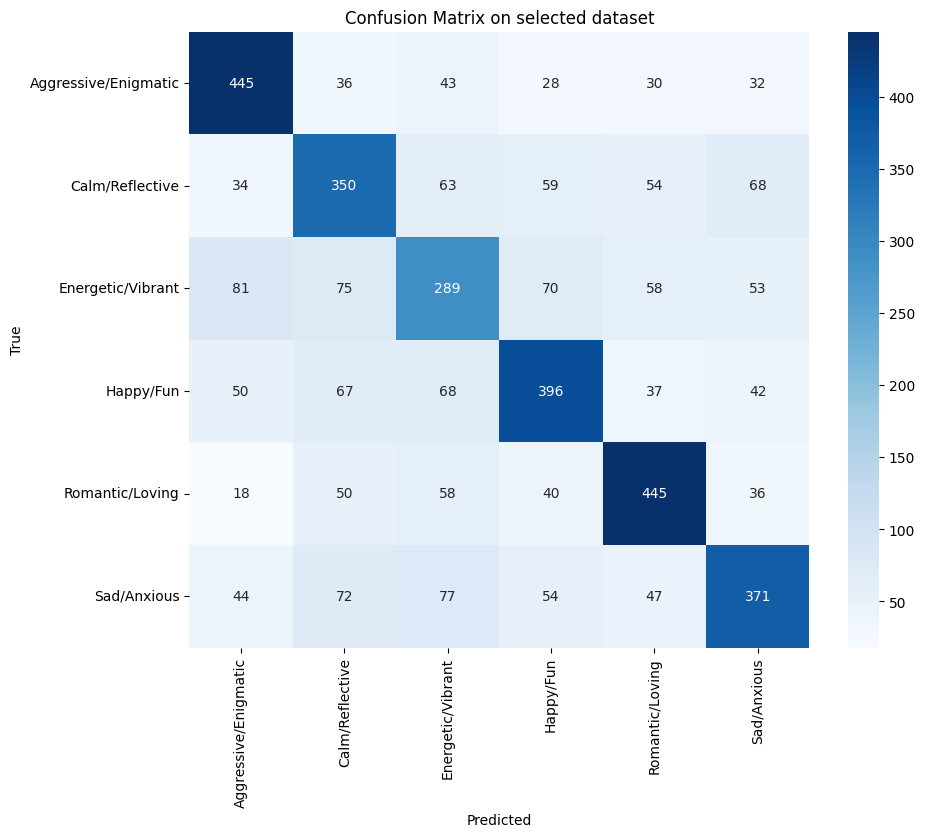

In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have label_encoder and vectorizer defined

# Count the number of examples for each label
label_counts = data['broad_category'].value_counts()

# Define the number of examples to be taken from each category
num_samples_per_category = 3200

# Select fixed number of examples from each label
selected_data = pd.DataFrame()

for label in label_counts.index:
    label_data = data[data['broad_category'] == label]
    selected_data = pd.concat([selected_data, resample(label_data, n_samples=num_samples_per_category, random_state=42)])

# Encode broad_category labels in the selected dataset
selected_data['broad_category_encoded'] = label_encoder.transform(selected_data['broad_category'])

# Split the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_data['cleaned_lyrics'],
    selected_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization
X_train_vectorized_selected = vectorizer.transform(X_train_selected)
X_test_vectorized_selected = vectorizer.transform(X_test_selected)

# Model Training
model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_vectorized_selected, y_train_selected)

# Model Evaluation
y_pred_selected = model_selected.predict(X_test_vectorized_selected)

accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
classification_rep_selected = classification_report(y_test_selected, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected)

print(f"Accuracy on selected dataset: {accuracy_selected}")
print("Classification Report on selected dataset:")
print(classification_rep_selected)
print("Confusion Matrix on selected dataset:")
print(conf_matrix_selected)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on selected dataset')
plt.show()

Equalizing the amount of training examples for each label by using resample from sklearn.
Manual selection was better.

Accuracy on balanced dataset: 0.5861981156098803
Classification Report on balanced dataset:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       633
           1       0.54      0.59      0.56       634
           2       0.47      0.47      0.47       644
           3       0.61      0.61      0.61       647
           4       0.64      0.69      0.66       670
           5       0.61      0.50      0.55       699

    accuracy                           0.59      3927
   macro avg       0.59      0.59      0.59      3927
weighted avg       0.59      0.59      0.59      3927

Confusion Matrix on balanced dataset:
[[426  38  66  37  28  38]
 [ 28 373  71  44  69  49]
 [ 72  75 302  72  62  61]
 [ 40  61  76 394  43  33]
 [ 24  58  43  45 460  40]
 [ 62  87  88  58  57 347]]


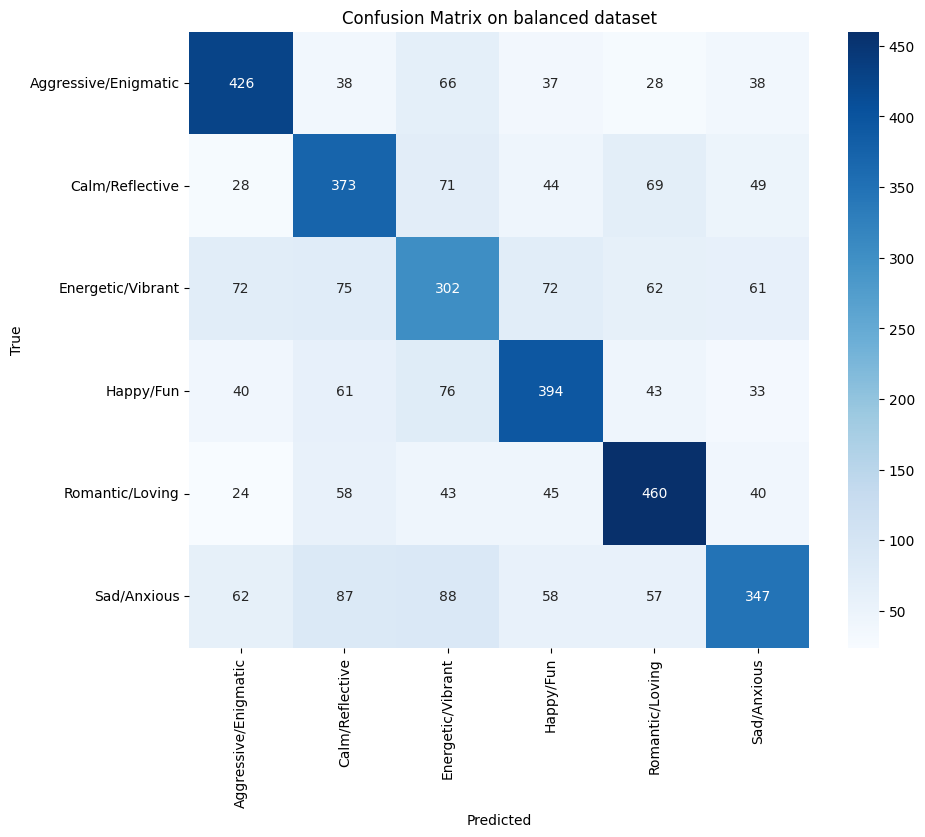

In [ ]:
from sklearn.utils import resample

# Count the number of examples for each label
label_counts = data['broad_category'].value_counts()

# Find the minimum count
min_count = label_counts.min()

# Equalize the dataset for each label
balanced_data = pd.DataFrame()

for label in label_counts.index:
    label_data = data[data['broad_category'] == label]
    balanced_data = pd.concat([balanced_data, resample(label_data, n_samples=min_count, random_state=42)])

# Encode broad_category labels in the balanced dataset
balanced_data['broad_category_encoded'] = label_encoder.transform(balanced_data['broad_category'])

# Split the balanced dataset
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    balanced_data['cleaned_lyrics'],
    balanced_data['broad_category_encoded'],
    test_size=0.2,
    random_state=42
)

# Text Vectorization
X_train_vectorized_balanced = vectorizer.transform(X_train_balanced)
X_test_vectorized_balanced = vectorizer.transform(X_test_balanced)

# Model Training
model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
model_balanced.fit(X_train_vectorized_balanced, y_train_balanced)

# Model Evaluation
y_pred_balanced = model_balanced.predict(X_test_vectorized_balanced)

accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
classification_rep_balanced = classification_report(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)

print(f"Accuracy on balanced dataset: {accuracy_balanced}")
print("Classification Report on balanced dataset:")
print(classification_rep_balanced)
print("Confusion Matrix on balanced dataset:")
print(conf_matrix_balanced)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on balanced dataset')
plt.show()

Training XGBoost with the balanced dataset using sklearn resample

Accuracy on balanced dataset using XGBoost: 0.5314489432136491
Classification Report using XGBoost:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       633
           1       0.52      0.52      0.52       634
           2       0.46      0.43      0.44       644
           3       0.50      0.55      0.52       647
           4       0.60      0.62      0.61       670
           5       0.52      0.47      0.49       699

    accuracy                           0.53      3927
   macro avg       0.53      0.53      0.53      3927
weighted avg       0.53      0.53      0.53      3927

Confusion Matrix using XGBoost:
[[375  45  48  66  48  51]
 [ 31 332  61  56  70  84]
 [ 88  73 275 102  54  52]
 [ 50  52  78 359  48  60]
 [ 29  48  53  62 417  61]
 [ 72  87  80  78  53 329]]


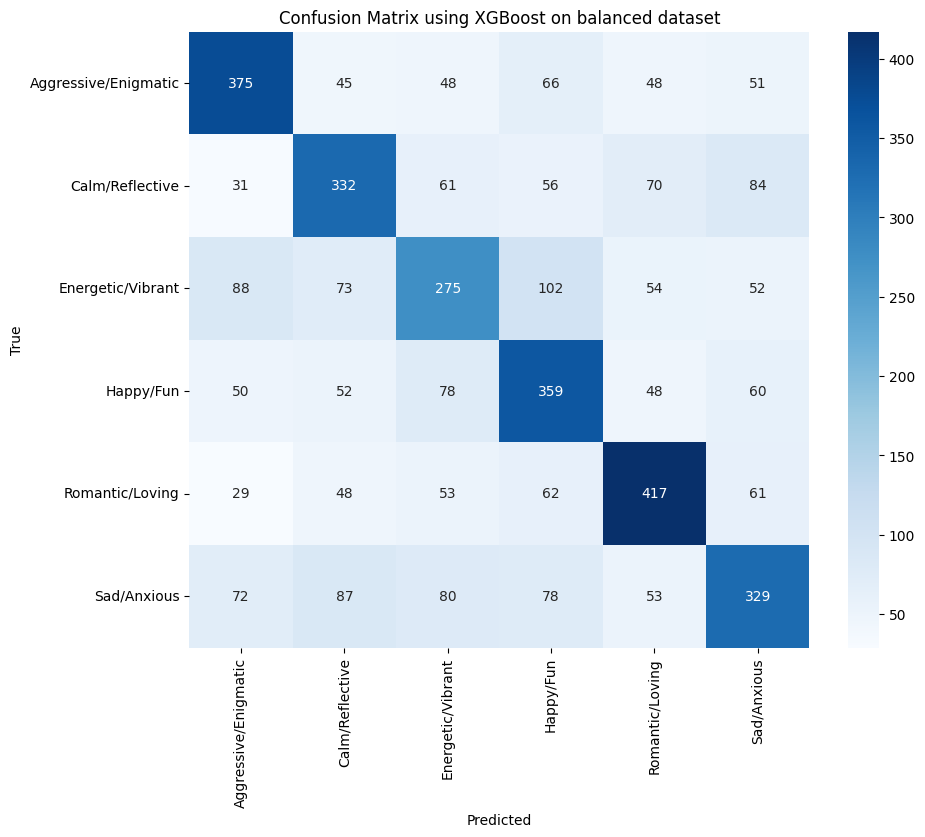

In [ ]:
import xgboost as xgb

# Model Training with XGBoost
model_xgboost = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    seed=42
)

model_xgboost.fit(X_train_vectorized_balanced, y_train_balanced)

# Model Evaluation
y_pred_xgboost = model_xgboost.predict(X_test_vectorized_balanced)

accuracy_xgboost = accuracy_score(y_test_balanced, y_pred_xgboost)
classification_rep_xgboost = classification_report(y_test_balanced, y_pred_xgboost)
conf_matrix_xgboost = confusion_matrix(y_test_balanced, y_pred_xgboost)

print(f"Accuracy on balanced dataset using XGBoost: {accuracy_xgboost}")
print("Classification Report using XGBoost:")
print(classification_rep_xgboost)
print("Confusion Matrix using XGBoost:")
print(conf_matrix_xgboost)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using XGBoost on balanced dataset')
plt.show()


Fine tuning XGBClassifier with GridSearchCV with balanced dataset

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Accuracy on balanced dataset using XGBoost after tuning: 0.5732111026228673
Classification Report using XGBoost after tuning:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       633
           1       0.57      0.58      0.57       634
           2       0.47      0.46      0.46       644
           3       0.55      0.60      0.57       647
           4       0.65      0.66      0.65       670
           5       0.57      0.51      0.54       699

    accuracy                           0.57      3927
   macro avg       0.57      0.57      0.57      3927
weighted avg       0.57      0.57      0.57      3927

Confusion Matrix using XGBoost after tuning:
[[403  30  59  61  35  45]
 [ 35 368  67  50  63  51]
 [ 70  69 294  99  52  60]
 [ 37  57  73 387  37  56]
 [ 27  46  50  49 441  57]
 [ 60  79  85  64  53 358]]


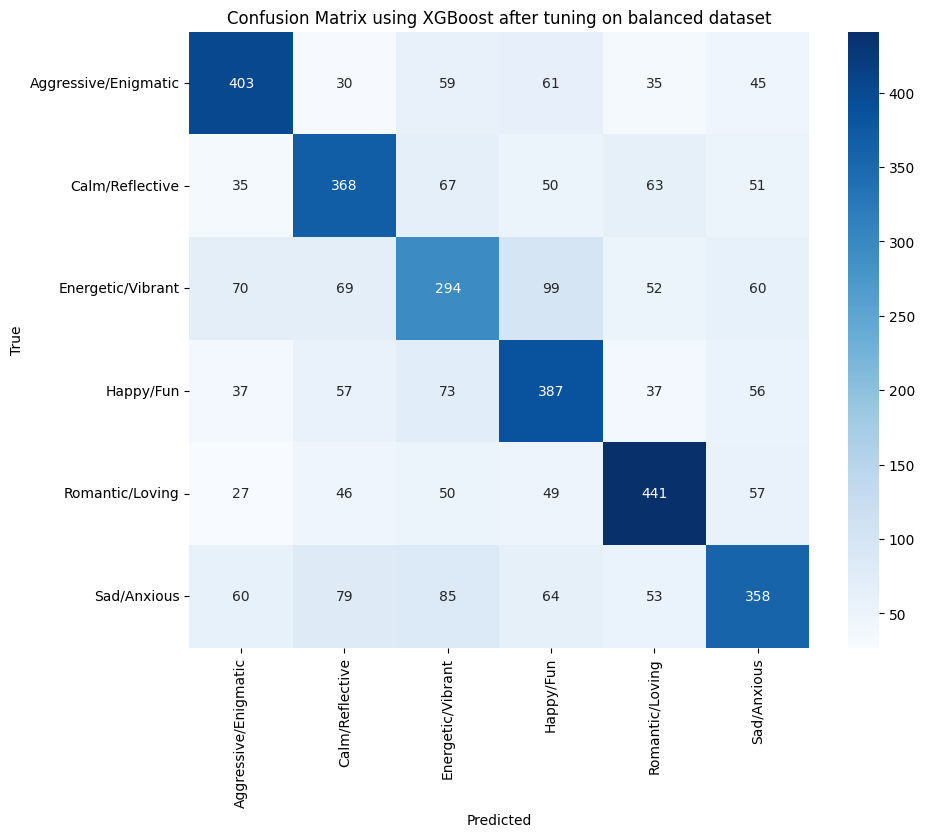

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Create an XGBoost classifier
model_xgboost = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    seed=42
)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_xgboost, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train_vectorized_balanced, y_train_balanced)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
best_model_xgboost = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),
    seed=42,
    **best_params
)

best_model_xgboost.fit(X_train_vectorized_balanced, y_train_balanced)

# Model Evaluation
y_pred_xgboost_tuned = best_model_xgboost.predict(X_test_vectorized_balanced)

accuracy_xgboost_tuned = accuracy_score(y_test_balanced, y_pred_xgboost_tuned)
classification_rep_xgboost_tuned = classification_report(y_test_balanced, y_pred_xgboost_tuned)
conf_matrix_xgboost_tuned = confusion_matrix(y_test_balanced, y_pred_xgboost_tuned)

print(f"Accuracy on balanced dataset using XGBoost after tuning: {accuracy_xgboost_tuned}")
print("Classification Report using XGBoost after tuning:")
print(classification_rep_xgboost_tuned)
print("Confusion Matrix using XGBoost after tuning:")
print(conf_matrix_xgboost_tuned)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgboost_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using XGBoost after tuning on balanced dataset')
plt.show()
